In [1]:
%matplotlib inline
import pandas as pd
import sys
import shutil
from alpenglow.experiments import BatchFactorExperiment, ExternalModelExperiment
from alpenglow.evaluation import DcgScore
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('http://info.ilab.sztaki.hu/~fbobee/alpenglow/tutorial_dataset.csv', header=None, names=['time', 'user', 'item'])

# turicreate model

In [3]:
exp = ExternalModelExperiment(
    period_length=60 * 60 * 24 * 7 * 4,
    in_name_base="batches/batch",
    mode="read",
) 

In [4]:
res = exp.run(data)

running experiment...


In [5]:
res['dcg'] = DcgScore(res)

In [6]:
res['dcg'].mean()

0.023746456208509535

# alpenglow batch factor model

In [7]:
exp = BatchFactorExperiment(
    period_length=60 * 60 * 24 * 7 * 4,
    negative_rate=5
)
res2 = exp.run(data)

running experiment...


In [8]:
res2['dcg'] = DcgScore(res2)

In [9]:
res2['dcg'].mean()

0.0173458838786909

# plotting

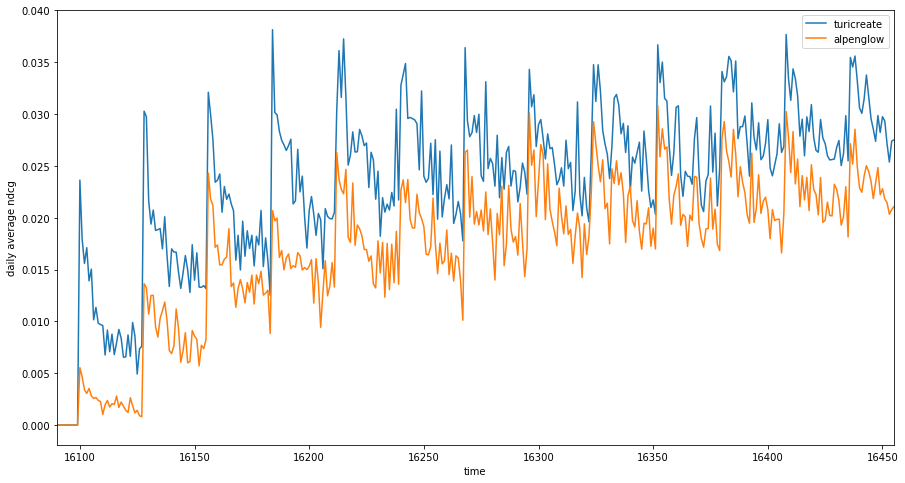

In [10]:
plt.figure(figsize=(15,8))
res.groupby(res.time//(60*60*24)).dcg.mean().plot()
res2.groupby(res2.time//(60*60*24)).dcg.mean().plot()
plt.ylabel('daily average ndcg')
plt.legend(['turicreate', 'alpenglow'])